# The client provided KPMG with 3 datasets:

## Import Library

In [172]:
import pandas as pd
import os
import matplotlib.pyplot as plt, seaborn as sns, numpy as np

## Read File

In [173]:
df = pd.ExcelFile('D:/DATA_ANALYST/KPMG VIRTUAL INTERNSHIP PROJECT/Dataset/raw_data1.xlsx')

In [174]:
Transactions = pd.read_excel(df, 'Transactions')
NewCustomerList = pd.read_excel(df, 'NewCustomerList')
CustomerDemographic = pd.read_excel(df, 'CustomerDemographic')
CustomerAddress = pd.read_excel(df, 'CustomerAddress')

C:\Users\Muhammad Khairul\AppData\Local\Temp\ipykernel_30948\1530699485.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList = pd.read_excel(df, 'NewCustomerList')
C:\Users\Muhammad Khairul\AppData\Local\Temp\ipykernel_30948\1530699485.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic = pd.read_excel(df, 'CustomerDemographic')


# Transactions Dataset

### Variable Correction

In [175]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [176]:
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='s')
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Check Column / Distribution

In [177]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [178]:
Transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46


In [179]:
Transactions.sample(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
5325,5326,0,1304,2017-09-30,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,1970-01-01 10:44:07
1766,1767,63,295,2017-11-26,1.0,Approved,Solex,Standard,medium,medium,1483.20,99.59,1970-01-01 11:42:25
17909,17910,81,438,2017-10-25,1.0,Approved,Solex,Standard,medium,medium,1151.96,649.49,1970-01-01 11:24:24
12813,12814,31,3150,2017-04-25,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,1970-01-01 10:50:31
10826,10827,19,3334,2017-09-08,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,1970-01-01 11:04:40
8555,8556,57,2632,2017-05-13,1.0,Approved,WeareA2B,Touring,medium,large,1890.39,260.14,1970-01-01 09:14:19
817,818,98,2989,2017-03-22,0.0,Approved,OHM Cycles,Standard,medium,medium,795.34,101.58,1970-01-01 10:30:23
14474,14475,19,2234,2017-07-29,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,1970-01-01 11:04:40
18720,18721,61,732,2017-05-15,0.0,Approved,OHM Cycles,Standard,low,medium,71.16,56.93,1970-01-01 11:42:52
11827,11828,36,1574,2017-09-09,0.0,Approved,Solex,Standard,low,medium,945.04,507.58,1970-01-01 10:08:18


    Product first Sold are in the same date

## Distribution

In [180]:
print("-------------------order_status----------------------")
print(Transactions['order_status'].value_counts())
print("-------------------product_size----------------------")
print(Transactions['product_size'].value_counts())
print("-------------------brand-----------------------------")
print(Transactions['brand'].value_counts())
print("-------------------product_class---------------------")
print(Transactions['product_class'].value_counts())



-------------------order_status----------------------
Approved     19821
Cancelled      179
Name: order_status, dtype: int64
-------------------product_size----------------------
medium    12990
large      3976
small      2837
Name: product_size, dtype: int64
-------------------brand-----------------------------
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64
-------------------product_class---------------------
medium    13826
high       3013
low        2964
Name: product_class, dtype: int64


### Check Missing Value

In [182]:
nan_df = Transactions[Transactions.isna().any(axis=1)]
nan_df.head(20)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 10:30:23
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,1970-01-01 10:41:22
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:30:38
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,1970-01-01 11:42:25
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 09:50:55
336,337,82,1615,2017-10-30,NaN,Approved,Norco Bicycles,Standard,high,medium,1148.64,689.18,1970-01-01 11:32:13
342,343,61,1478,2017-03-11,NaN,Approved,Norco Bicycles,Standard,medium,small,586.45,521.94,1970-01-01 09:17:09
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT


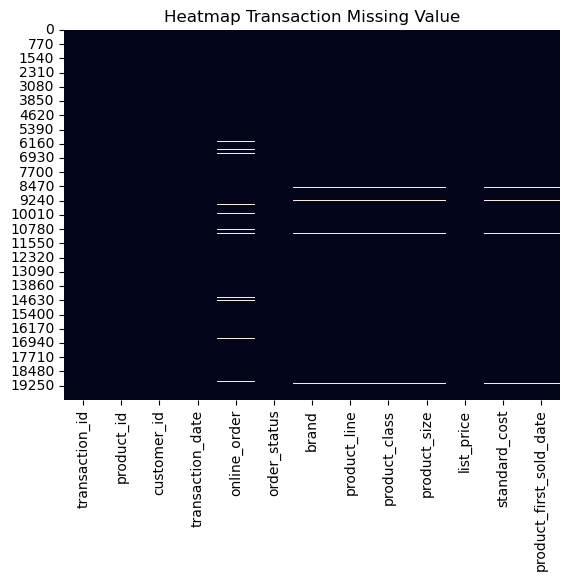

In [183]:
sns.heatmap(Transactions.isnull(), cbar=False)
plt.title('Heatmap Transaction Missing Value')
plt.show()

In [184]:
#Checking for null values
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [185]:
(Transactions.isnull().sum()/len(Transactions)).to_frame('persentase missing')

,persentase missing
transaction_id,0.00000
product_id,0.00000
customer_id,0.00000
transaction_date,0.00000
online_order,0.01800
order_status,0.00000
brand,0.00985
product_line,0.00985
product_class,0.00985
product_size,0.00985


In [186]:
Transactions = Transactions.dropna(how='all')
Transactions.dropna(inplace=True)
Transactions = Transactions.reset_index(drop=True)


    There are missing values in 7 columns with small missing value percentage

### Chech Duplicate Data

In [187]:
print(Transactions.shape)
Transactions.duplicated().sum()

(19445, 13)


0

    There is no Duplicate Data

# NewCustomerList Data Set

## Check Column

In [188]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [189]:
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

    There are 5 unamed columns

In [190]:
#Dropping the unnamed columns
NewCustomerList.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [191]:
NewCustomerList.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [192]:
NewCustomerList.sample(10)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
389,Fara,Sarath,Female,75,1948-06-30,Quality Control Specialist,NaN,Mass Customer,N,No,22,540 Forest Run Plaza,2168,NSW,Australia,7,386,0.945625
844,Maris,Leete,Female,21,1973-04-14,Engineer IV,Retail,Mass Customer,N,No,7,06 Main Alley,4300,QLD,Australia,4,845,0.563125
760,Leighton,Firbanks,Male,51,1973-12-22,Teacher,Retail,Affluent Customer,N,No,21,7234 Sycamore Pass,4178,QLD,Australia,3,760,0.637500
825,Tessa,Heakey,Female,43,1971-05-31,Senior Financial Analyst,Financial Services,Mass Customer,N,No,9,6233 Fulton Point,3337,VIC,Australia,6,820,0.584375
470,Ceciley,Harg,Female,50,1990-10-19,Nurse Practicioner,Retail,Mass Customer,N,Yes,4,409 Starling Lane,4172,QLD,Australia,7,471,0.887500
92,Andromache,Bonafacino,Female,84,1977-09-01,NaN,Retail,Mass Customer,N,No,11,74 Carpenter Street,2015,NSW,Australia,9,89,1.312500
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
550,Cami,Eitter,Female,34,1979-01-03,Professor,Manufacturing,High Net Worth,N,Yes,11,1408 Hovde Circle,3081,VIC,Australia,9,551,0.818125
573,Charmain,Styles,Female,49,1965-02-25,Programmer Analyst I,Property,High Net Worth,N,Yes,18,423 Holy Cross Lane,3029,VIC,Australia,7,574,0.799000
785,Rafi,Brettelle,Male,89,1956-08-12,Operator,Health,High Net Worth,N,No,6,11 Brickson Park Alley,2166,NSW,Australia,10,786,0.616250


## Distribution

In [193]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [194]:
print("-------------------Gender----------------------")
print(NewCustomerList['gender'].value_counts())

-------------------Gender----------------------
Female    513
Male      470
U          17
Name: gender, dtype: int64


    There are 17 columns with unknown/unspecified gender/ Gender "U".

In [195]:
print("-------------------wealth_segment---------------------")
print(NewCustomerList['wealth_segment'].value_counts())

-------------------wealth_segment---------------------
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64


In [196]:
print("-------------------job_title----------------------")
print(NewCustomerList['job_title'].value_counts().head(60))

-------------------job_title----------------------
Associate Professor                     15
Environmental Tech                      14
Software Consultant                     14
Chief Design Engineer                   13
Assistant Manager                       12
Assistant Media Planner                 12
Senior Sales Associate                  12
VP Sales                                12
Cost Accountant                         12
Social Worker                           11
Payment Adjustment Coordinator          11
Account Executive                       11
Nurse Practicioner                      11
VP Quality Control                      11
Environmental Specialist                11
Junior Executive                        11
VP Marketing                            11
Human Resources Manager                 10
Business Systems Development Analyst    10
Product Engineer                        10
Chemical Engineer                       10
Dental Hygienist                        10
Lib

In [197]:
print("-------------------job_industry_category-----------------------------")
print(NewCustomerList['job_industry_category'].value_counts())

-------------------job_industry_category-----------------------------
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64


## Check Missing Value

In [199]:
nan_NewCostumerList = NewCustomerList[NewCustomerList.isna().any(axis=1)]
nan_NewCostumerList.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750


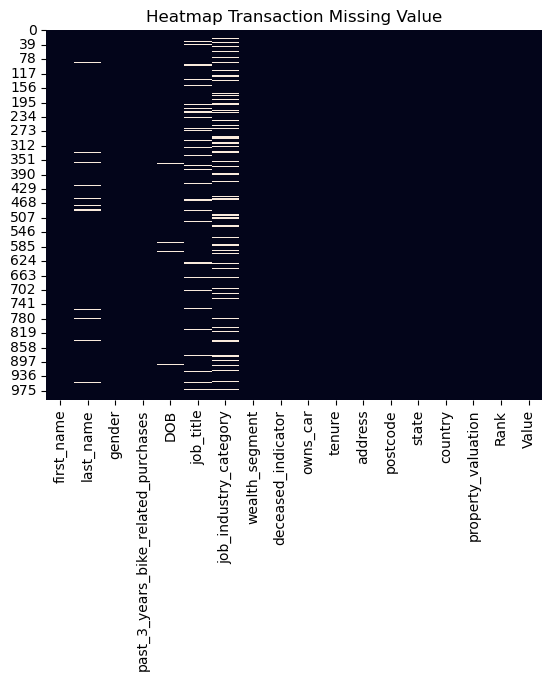

In [200]:
# variable relation with the missing value
sns.heatmap(NewCustomerList.isnull(), cbar=False)
plt.title('Heatmap Transaction Missing Value')
plt.show()

In [201]:
#Checking for null values
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [202]:
(NewCustomerList.isnull().sum()/len(NewCustomerList)).to_frame('persentase missing')

,persentase missing
first_name,0.000
last_name,0.029
gender,0.000
past_3_years_bike_related_purchases,0.000
DOB,0.017
job_title,0.106
job_industry_category,0.165
wealth_segment,0.000
deceased_indicator,0.000
owns_car,0.000


In [203]:
# NewCustomerList = NewCustomerList.dropna(how='all')
# NewCustomerList.dropna(inplace=True)
# NewCustomerList = NewCustomerList.reset_index(drop=True)


    There are missing values in 4 columns with small missing value percentage

### Chech Duplicate Data

In [204]:
print(NewCustomerList.shape)
NewCustomerList.duplicated().sum()

(1000, 18)


0

    There is no duplicate Data

# CustomerDemographic Dataset

## Check Column

In [207]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [208]:
CustomerDemographic.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0


In [209]:
CustomerDemographic.sample(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
2074,2075,Devondra,Jovis,Female,95,1973-04-23,Environmental Tech,Manufacturing,Mass Customer,N,100,No,8.0
2463,2464,Cleve,Jindrak,Male,78,1983-04-06,Speech Pathologist,Retail,Mass Customer,N,â¦testâ§,No,6.0
3285,3286,Kent,Hatter,Male,23,1961-06-02,Assistant Media Planner,Entertainment,Mass Customer,N,×Ö¸×Ö°×ªÖ¸×testØ§ÙØµÙØ­Ø§Øª Ø§ÙØªÙØ­ÙÙ,No,20.0
2294,2295,Farris,Hazelby,U,35,NaT,Internal Auditor,IT,Mass Customer,N,NaN,Yes,NaN
3043,3044,Russell,Brittoner,Male,59,1990-04-11,Occupational Therapist,Health,Affluent Customer,N,"×Ö¼Ö°×¨Öµ××©×Ö´××ª, ×Ö¼Ö¸×¨Ö¸× ×Ö±×Ö¹×Ö´××, ×Ö...",Yes,19.0
1513,1514,Pren,Brangan,Male,15,1962-01-16,Professor,NaN,Mass Customer,N,<script>alert('hi')</script>,No,14.0
2204,2205,Birk,Elphey,U,76,NaT,Accounting Assistant III,IT,Mass Customer,N,NaN,No,NaN
3651,3652,Aldrich,Camble,Male,20,1955-02-06,Nurse,Health,High Net Worth,N,`ââ¬â¹âºï¬ï¬â¡Â°Â·ââÂ±,Yes,17.0
554,555,Jarib,Senior,Male,99,1970-11-08,Junior Executive,Property,Mass Customer,N,Î©âÃ§ââ«ËÂµâ¤â¥Ã·,No,4.0
1641,1642,Nollie,Matteoli,Male,97,1982-10-11,Systems Administrator II,Manufacturing,Affluent Customer,N,100,Yes,3.0


In [215]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [214]:
CustomerDemographic.drop("default", axis=1, inplace=True)

    There is 1 unspecified column named "default"

## Distribution

In [229]:
print("-------------------Gender----------------------")
print(CustomerDemographic['gender'].value_counts())

-------------------Gender----------------------
Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64


    There are unspecified gender named "U" and another gender in these categories are re-named.

In [218]:
#Re-naming the categories
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')

In [219]:
print("-------------------Gender----------------------")
print(CustomerDemographic['gender'].value_counts())

-------------------Gender----------------------
Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64


## Check Missing Value

In [220]:
nan_CustomerDemographic = CustomerDemographic[CustomerDemographic.isna().any(axis=1)]
nan_CustomerDemographic.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0


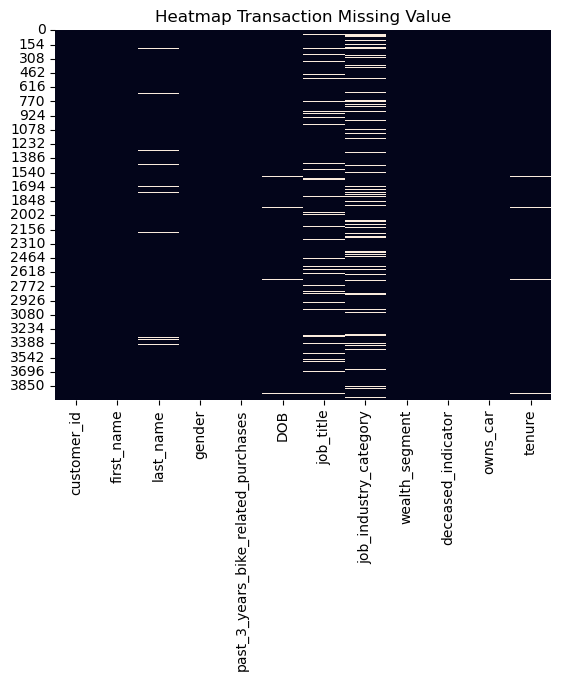

In [221]:
# variable relation with the missing value
sns.heatmap(CustomerDemographic.isnull(), cbar=False)
plt.title('Heatmap Transaction Missing Value')
plt.show()

In [222]:
#Checking for null values
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [223]:
(CustomerDemographic.isnull().sum()/len(CustomerDemographic)).to_frame('persentase missing')

,persentase missing
customer_id,0.00000
first_name,0.00000
last_name,0.03125
gender,0.00000
past_3_years_bike_related_purchases,0.00000
DOB,0.02175
job_title,0.12650
job_industry_category,0.16400
wealth_segment,0.00000
deceased_indicator,0.00000


In [ ]:
# NewCustomerList = NewCustomerList.dropna(how='all')
# NewCustomerList.dropna(inplace=True)
# NewCustomerList = NewCustomerList.reset_index(drop=True)


    There are missing values in 5 columns

### Check Duplicate Data

In [224]:
print(CustomerDemographic.shape)
CustomerDemographic.duplicated().sum()

(4000, 12)


0

In [233]:
CustomerDemographic[CustomerDemographic.duplicated(subset=["customer_id"], keep=False)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure


    There is no duplicate Data

# CustomerAddress Dataset

## Check Column

In [230]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [231]:
CustomerAddress.head(10)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,New South Wales,Australia,9
6,8,49 Londonderry Lane,2650,New South Wales,Australia,4
7,9,97736 7th Trail,2023,New South Wales,Australia,12
8,11,93405 Ludington Park,3044,VIC,Australia,8
9,12,44339 Golden Leaf Alley,4557,QLD,Australia,4


In [235]:
CustomerAddress.sample(10)

,customer_id,address,postcode,state,country,property_valuation
783,788,00 Mockingbird Junction,2141,NSW,Australia,9
2021,2026,9 Melvin Drive,2144,NSW,Australia,7
421,426,15082 Crest Line Plaza,3040,VIC,Australia,8
1170,1175,79 Grasskamp Center,2170,NSW,Australia,9
229,234,816 Spohn Center,2036,NSW,Australia,10
544,549,2 East Circle,2716,NSW,Australia,1
3029,3034,638 Browning Terrace,3079,VIC,Australia,6
3584,3589,1 Esker Pass,4575,QLD,Australia,8
16,19,59 Spaight Circle,2233,New South Wales,Australia,9
680,685,39035 Westerfield Plaza,2463,NSW,Australia,4


In [236]:
CustomerAddress.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

## Distribution

In [237]:
print("-------------------state----------------------")
print(CustomerAddress['state'].value_counts())

-------------------state----------------------
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64


## Check Missing Value

In [241]:
nan_CustomerAddress = CustomerAddress[CustomerAddress.isna().any(axis=1)]
nan_CustomerAddress.head(5)

,customer_id,address,postcode,state,country,property_valuation


In [243]:
#Checking for null values
CustomerAddress.isnull().sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64


    There is no missing values in this dataset

### Check Duplicate Data

In [244]:
print(CustomerAddress.shape)
CustomerAddress.duplicated().sum()

(0, 6)


0


    There is no duplicate in this dataset

# Conclussion of the Data Quality

## Transaction Dataset
- Column "Product first Sold" are in the same date
- Data type correction "product_first_sold_date "to datetime
- There are missing values in 7 columns with small missing value percentage
- There is no duplicate data

## Newcostumerlist Dataset
- There are 5 unamed columns
- There are 17 columns with unknown/unspecified gender/ Gender "U".
- There are missing values in 4 columns with small missing value percentage
- There is no duplicate data

## CustomerDemograhic Dataset
- There are unspecified gender named "U" and another gender in these categories are re-named.
- There are missing values in 5 columns
- There is no duplicate data

## CustomerAddres Dataset
Dataset have good quality